# Iris_Classification

#### Importing the requisite libraries

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Importing the Iris Dataset

In [268]:
df_iris = pd.read_csv("iris.csv",header = 0)

In [269]:
df_iris.drop(columns='Id',inplace=True)

In [270]:
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Checking the null values if any

In [271]:
df_iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Checking the duplicate values if any

In [272]:
df_iris.duplicated().sum()

3

In [273]:
df_iris = df_iris.drop_duplicates()

#### Data Information

In [274]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


#### Descriptive Statistics of the Iris Dataset

In [275]:
df_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## EDA on Iris Dataset

In [276]:
df_iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [277]:
df_iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

<AxesSubplot:>

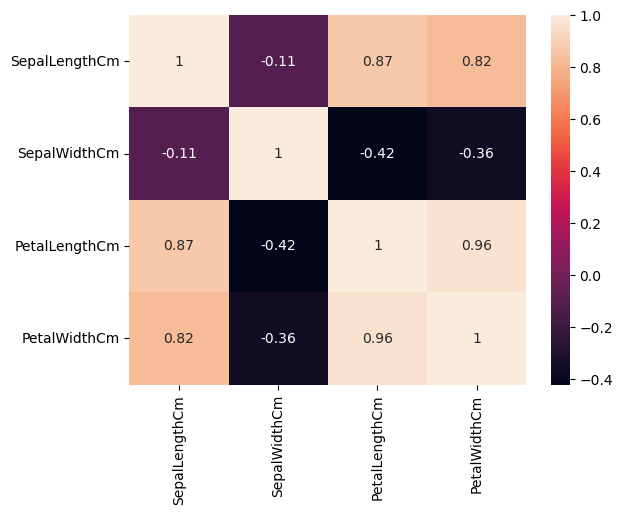

In [278]:
sns.heatmap(df_iris.corr(),annot=True)

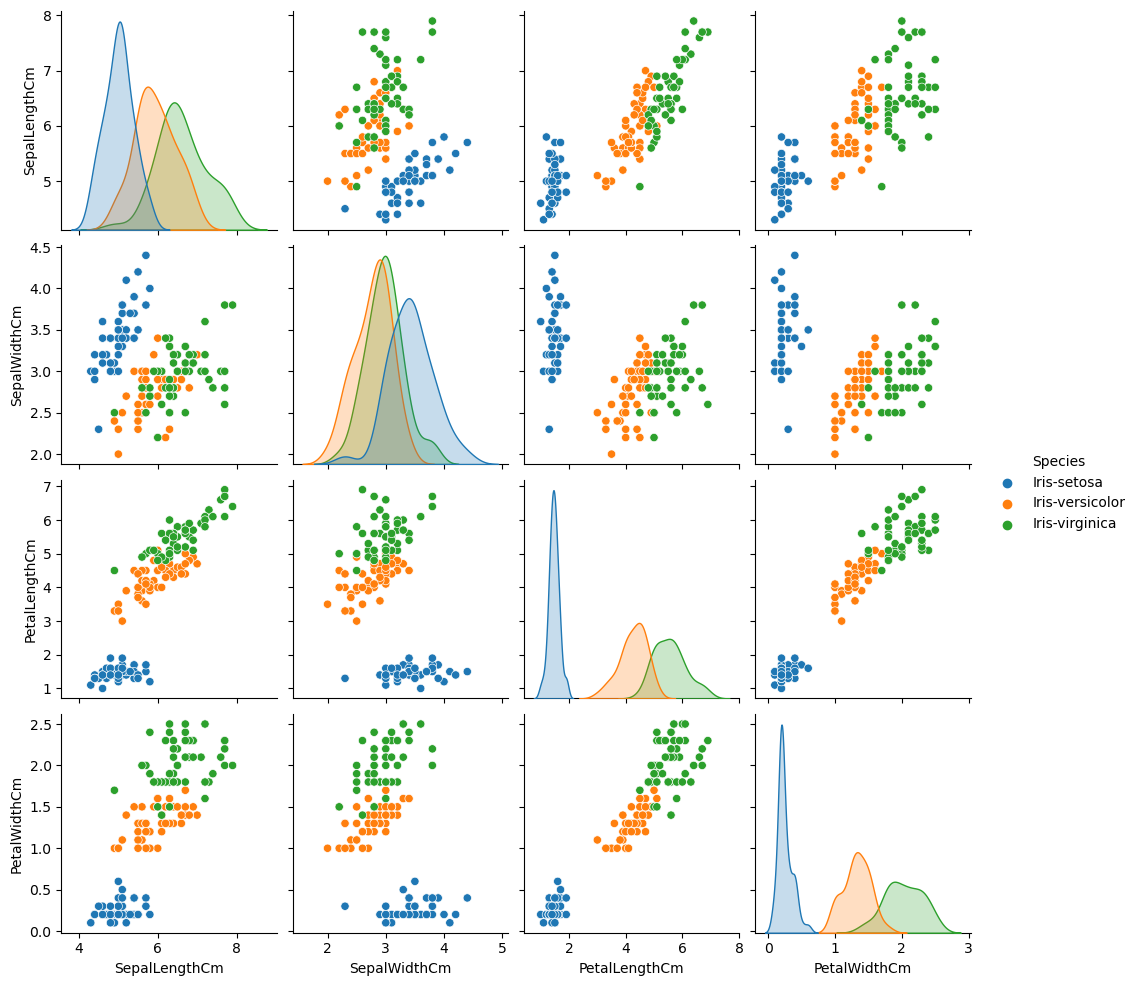

In [279]:
sns.pairplot(df_iris,hue='Species')

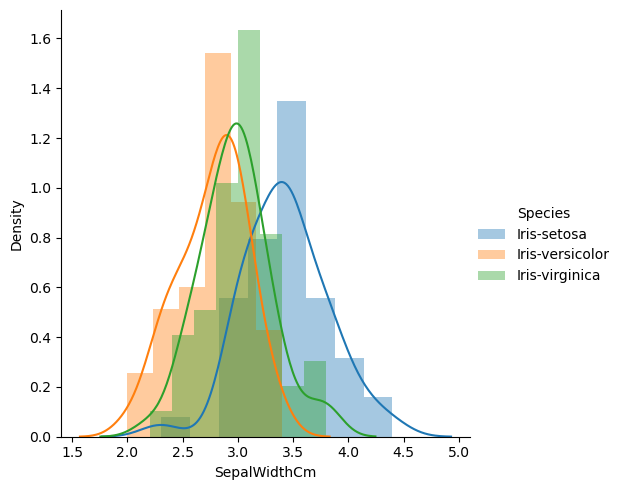

In [280]:
sns.FacetGrid(df_iris,hue="Species",size=5) \
    .map(sns.distplot,"SepalWidthCm") \
    .add_legend()
plt.show()

# Model Training

In [281]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [282]:
X = df_iris.iloc[:,:-1]
y = df_iris.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [283]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [284]:
model = LogisticRegression()

In [285]:
param = {'C':[0.1,1,10],'penalty':['l1','l2','none','elasticnet']}

In [286]:
grid_search = GridSearchCV(model,param,cv = 5)

In [287]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'none', 'elasticnet']})

In [288]:
grid_search.score(X_train,y_train)

0.9705882352941176

In [289]:
y_pred = grid_search.predict(X_test)

In [290]:
print("Train accuracy:",grid_search.score(X_train,y_train))
print("Test accuracy:",grid_search.score(X_test,y_test))

Train accuracy: 0.9705882352941176
Test accuracy: 0.9555555555555556


In [291]:
print("classification repoort \n\n\n",classification_report(y_test,y_pred))

classification repoort 


                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [292]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 13]], dtype=int64)

# KNN

In [293]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [294]:
KNN = KNeighborsClassifier(n_neighbors = 3)

In [295]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [296]:
y_pred=KNN.predict(X_test)

In [297]:
print("accuracy:",accuracy_score(y_test,y_pred))

accuracy: 0.9555555555555556


In [298]:
report= classification_report(y_test,y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



<AxesSubplot:>

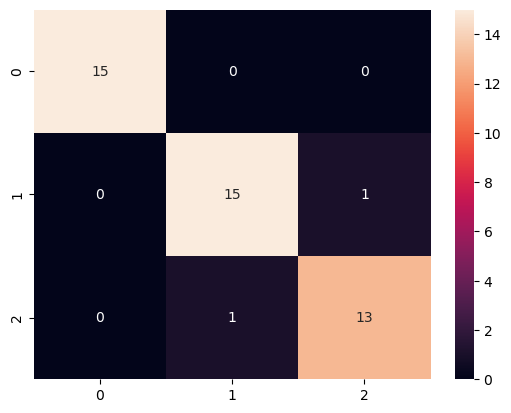

In [299]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

# SVC

In [300]:
from sklearn.svm import SVC
model3 = SVC()

In [301]:
param = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],'kernel':['linear','rbf']}

In [302]:
grid_model =  GridSearchCV(model3,param_grid = param,cv=5)

In [303]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']})

In [304]:
grid_model.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [305]:
grid_model.best_score_

0.9604761904761905

In [306]:
y_pred = grid_model.predict(X_test)

In [307]:
print('accuracy:',accuracy_score(y_test,y_pred))

accuracy: 0.9777777777777777


In [309]:
report= classification_report(y_test,y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



<AxesSubplot:>

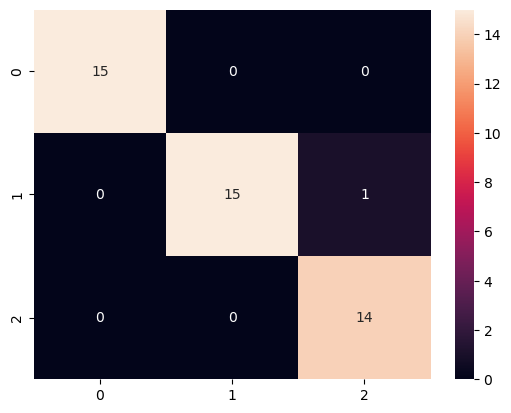

In [310]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)